<a href="https://colab.research.google.com/github/Refeena/ViolenceDetection/blob/main/Violence_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
!get https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5

/bin/bash: get: command not found


In [ ]:
#print("Downloading the MobileNet........")
image_model = MobileNet(include_top=True, weights='imagenet')
#print("Completed the Downloading of MobileNet")

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
in_dir_1 = '/content/drive/MyDrive/test'
print ("Done!")
print(in_dir_1)

#1,3,5,7-VIOLENCE VIDEO
#2,4,6,8-NON_VIOLENCE VIDEOS

Done!
/content/drive/MyDrive/test


In [ ]:
# Frame size  
img_size = 224

img_size_touple = (img_size, img_size)

# Number of frames per video
_images_per_file = 20

transfer_values_size = 1000

transfer_layer = image_model.get_layer('reshape_2')

image_model_transfer = Model(inputs=image_model.input,
                             outputs=transfer_layer.output)

In [ ]:

def video_names(in_dir_1):
    
    # list containing video names
    names1 = []

    for current_dir, dir_names,file_names in os.walk(in_dir_1):
        
        for file_name1 in file_names:
          
           names1.append(file_name1)

           #shuffle(names1)
                  
    return tuple(names1)

print ("Done!")

Done!


In [ ]:
def get_frames(in_dir_1, file_name):
    ''' if file_name[0]=="V":
        dir ="/Violence"
        in_file = os.path.join(current_dir+str(dir), file_name)
        print(in_file)
      else:
        dir ="/NonViolence"
        in_file = os.path.join(current_dir+str(dir), file_name)
        print(in_file)'''
    in_file = os.path.join(in_dir_1, file_name)
    images = []
    
    vidcap = cv2.VideoCapture(in_file)
    
    success,image = vidcap.read()
        
    count = 0

    

    while count<_images_per_file:
                
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        res = cv2.resize(RGB_img, dsize=(img_size, img_size),
                                 interpolation=cv2.INTER_CUBIC)
    
        images.append(res)
    
        success,image = vidcap.read()
    
        count += 1
        
    resul = np.array(images)
    
    resul = (resul / 255.).astype(np.float16)
        
    return resul

print ("Done!")

Done!


In [ ]:
def get_transfer_values(current_dir, file_name):
    
    # Pre-allocate input-batch-array for images.
    shape = (_images_per_file,) + img_size_touple + (3,)
    
    image_batch = np.zeros(shape=shape, dtype=np.float16)
    
    image_batch = get_frames(current_dir, file_name)
      
    # Pre-allocate output-array for transfer-values.
    shape = (_images_per_file, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    transfer_values = \
            image_model_transfer.predict(image_batch)
            
    return transfer_values

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/model')

In [ ]:
# Storing in names1
names1 = video_names(in_dir_1)
print ("Done!")

print(names1)

Done!
('1.mp4', '7.mp4', '3.mp4', '5.mp4', '2.mp4', '4.mp4', '6.mp4', '8.mp4', 'violenceTest.mp4', 'violenceTest2.mp4', 'nonviolencetest.mp4')


In [ ]:
video_no=names1[10]
print(video_no)

nonviolencetest.mp4


In [ ]:
path = input("Enter the path for video")

Enter the path for video/content/drive/MyDrive/test/nonviolencetest.mp4


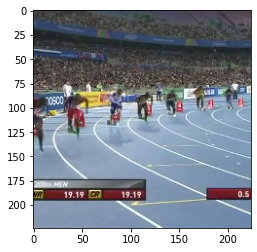

In [ ]:
frames1 = get_frames(in_dir_1, path)
visible_frame = (frames1*255).astype('uint8')
plt.imshow(visible_frame[19])
img_input=visible_frame[19]
#print(visible_frame)

In [ ]:
from PIL import Image, ImageOps
from numpy import asarray

def add_border(input_image, output_image, border, color=0):
    img = Image.open(input_image)
    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
    else:
        raise RuntimeError('Border is not an integer or tuple!')
    bimg.save(output_image)

In [ ]:
gr_im= Image.fromarray(img_input).save('violence_1.jpg')
in_img = 'violence_1.jpg'

RESULT-VIOLENCE NOT PRESENT


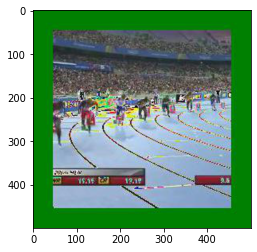

In [ ]:
video = get_transfer_values(in_dir_1, path)
video = video.reshape((1, video.shape[0], video.shape[1]))
label = np.argmax(model.predict(video))

if(label==1):
  print('RESULT-VIOLENCE NOT PRESENT')
  color_br='green'
else:
  print('RESULT-VIOLENCE PRESENT')
  color_br='red'

add_border(in_img ,output_image='violence_final.jpg',border=25,color=color_br)
# load the image
image = np.array(Image.open('violence_final.jpg').resize((500,500)))
# convert image to numpy array
data = asarray(image)
plt.imshow(data)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               3098624   
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 50)                51250     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1